In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [120]:
df = pd.read_csv('data\proposicoes_2013-2024_final_pres_cam.csv')
df = df[df['Desenvolvimento Social e Urbano'] == 1]
df = df.drop(columns=['Administração e Políticas Públicas', 'Direitos e Justiça', 'Economia e Desenvolvimento Sustentável', 'Infraestrutura e Gestão de Recursos'])
df

,nomeProposicao,idProposicao,partidoAutor,DataApresentacao,Ano,Desenvolvimento Social e Urbano,VirouLei,Influencia,Aliado,Oposição,Partido_Pres_Cam,PPC_igual_partidoAutor
0,PL 4926/2013,564574,PR,2013-02-04,2013,1,0,0.077973,1,0,PMDB,0
1,PL 4931/2013,564595,PR,2013-02-04,2013,1,0,0.024691,1,0,PMDB,0
2,PL 4928/2013,564579,PSB,2013-02-04,2013,1,0,0.025341,1,0,PMDB,0
5,PL 4940/2013,564649,PSB,2013-02-05,2013,1,0,0.171540,1,0,PMDB,0
8,PL 4946/2013,564684,PR,2013-02-05,2013,1,0,0.079922,1,0,PMDB,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7951,PL 1642/2024,2431965,PL,2024-05-08,2024,1,0,0.035088,0,1,PP,0
7953,PL 2078/2024,2436632,REPUBLICANOS,2024-05-27,2024,1,0,0.083821,0,0,PP,0
7954,PL 2065/2024,2436563,UNIÃO,2024-05-27,2024,1,0,0.085770,1,0,PP,0
7958,PL 3148/2024,2452628,PSB,2024-08-13,2024,1,1,0.132554,1,0,PP,0


- Analise

In [121]:
df['Partido_Pres_Cam'].unique()

array(['PMDB', 'PP', 'DEM'], dtype=object)

In [122]:
df['PPC_igual_partidoAutor'].value_counts()

PPC_igual_partidoAutor
0    3749
1     385
Name: count, dtype: int64

In [123]:
cols = [col for col in df.columns if col != 'VirouLei' and col != 'Partido_Pres_Cam'] + ['VirouLei'] + ['Partido_Pres_Cam']
df = df[cols]
df

,nomeProposicao,idProposicao,partidoAutor,DataApresentacao,Ano,Desenvolvimento Social e Urbano,Influencia,Aliado,Oposição,PPC_igual_partidoAutor,VirouLei,Partido_Pres_Cam
0,PL 4926/2013,564574,PR,2013-02-04,2013,1,0.077973,1,0,0,0,PMDB
1,PL 4931/2013,564595,PR,2013-02-04,2013,1,0.024691,1,0,0,0,PMDB
2,PL 4928/2013,564579,PSB,2013-02-04,2013,1,0.025341,1,0,0,0,PMDB
5,PL 4940/2013,564649,PSB,2013-02-05,2013,1,0.171540,1,0,0,0,PMDB
8,PL 4946/2013,564684,PR,2013-02-05,2013,1,0.079922,1,0,0,0,PMDB
...,...,...,...,...,...,...,...,...,...,...,...,...
7951,PL 1642/2024,2431965,PL,2024-05-08,2024,1,0.035088,0,1,0,0,PP
7953,PL 2078/2024,2436632,REPUBLICANOS,2024-05-27,2024,1,0.083821,0,0,0,0,PP
7954,PL 2065/2024,2436563,UNIÃO,2024-05-27,2024,1,0.085770,1,0,0,0,PP
7958,PL 3148/2024,2452628,PSB,2024-08-13,2024,1,0.132554,1,0,0,1,PP


- Destacando 2024

In [124]:
df_2024 = df[df['Ano'] == 2024]
df = df[df['Ano'] != 2024]


In [125]:
df_2024['VirouLei'].value_counts()

VirouLei
0    6
1    2
Name: count, dtype: int64

In [126]:
df['VirouLei'].value_counts()

VirouLei
0    3603
1     523
Name: count, dtype: int64

- Features e Rotúlo

In [127]:
colunas = df.columns.tolist()
colunas

['nomeProposicao',
 'idProposicao',
 'partidoAutor',
 'DataApresentacao',
 'Ano',
 'Desenvolvimento Social e Urbano',
 'Influencia',
 'Aliado',
 'Oposição',
 'PPC_igual_partidoAutor',
 'VirouLei',
 'Partido_Pres_Cam']

In [128]:
x = df[colunas[6:-2]]
y = df[colunas[-2]]

x

,Influencia,Aliado,Oposição,PPC_igual_partidoAutor
0,0.077973,1,0,0
1,0.024691,1,0,0
2,0.025341,1,0,0
5,0.171540,1,0,0
8,0.079922,1,0,0
...,...,...,...,...
7934,0.132812,1,0,1
7935,0.115234,1,0,0
7936,0.080078,0,1,0
7937,0.029297,1,0,0


- undersampling

In [313]:
#undersample = RandomUnderSampler(sampling_strategy=1.0) #para igualar as classes
#undersample = RandomUnderSampler(sampling_strategy=0.428) #70% 30%
undersample = RandomUnderSampler(sampling_strategy=0.528)

x_sample, y_sample = undersample.fit_resample(x, y)

In [314]:
y_sample.value_counts()

VirouLei
0    990
1    523
Name: count, dtype: int64

In [315]:
indices_iguais = x_sample.index.equals(y_sample.index)
indices_iguais

True

In [316]:
x_sample

,Influencia,Aliado,Oposição,PPC_igual_partidoAutor
3425,0.067251,0,0,0
7294,0.015595,0,1,0
364,0.171540,1,0,1
7252,0.013645,0,1,0
1653,0.008230,0,1,0
...,...,...,...,...
7923,0.115234,1,0,0
7934,0.132812,1,0,1
7935,0.115234,1,0,0
7936,0.080078,0,1,0


In [317]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_sample, y_sample, test_size=0.3, random_state=42)

In [318]:
#penalização customizada
#class_w = {0: 20, 1: 20}
#clf_s = DecisionTreeClassifier(class_weight=class_w)

clf_s = DecisionTreeClassifier(class_weight='balanced')

#clf_s = DecisionTreeClassifier()
clf_s.fit(x_train_s, y_train_s)

y_pred_prob = clf_s.predict_proba(x_test_s)
y_pred_s = clf_s.predict(x_test_s)

- verificando overfitting

In [319]:
y_train_pred = clf_s.predict(x_train_s)
train_accuracy = accuracy_score(y_train_s, y_train_pred)

test_accuracy = accuracy_score(y_test_s, y_pred_s)

print(f"Acurácia no treino: {train_accuracy}")
print(f"Acurácia no teste: {test_accuracy}")

Acurácia no treino: 0.7072710103871577
Acurácia no teste: 0.5638766519823789


In [320]:
tree_depth = clf_s.tree_.max_depth
print(f"Profundidade da árvore: {tree_depth}")

Profundidade da árvore: 18


- Limitando a probabilidade

In [321]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(x_train_s, y_train_s)

y_pred_lim = clf.predict(x_test_s)
lim_accuracy = accuracy_score(y_test_s, y_pred_lim)

y_train_pred_lim = clf.predict(x_train_s)
train_accuracy_lim = accuracy_score(y_train_s, y_train_pred_lim)

print(f"Acurácia no treino com limite de profundidade: {train_accuracy_lim}")
print(f"Acurácia no teste com limite de profundidade: {lim_accuracy}")

print(f'Acurácia do modelo: {lim_accuracy*100:.2f}%')

Acurácia no treino com limite de profundidade: 0.6713881019830028
Acurácia no teste com limite de profundidade: 0.6431718061674009
Acurácia do modelo: 64.32%


In [322]:
tree_depth = clf.tree_.max_depth
print(f"Profundidade da árvore: {tree_depth}")

Profundidade da árvore: 5


- Visualização

In [323]:
print('Com undersampling')
print(classification_report(y_test_s, y_pred_s))

Com undersampling
              precision    recall  f1-score   support

           0       0.68      0.63      0.66       297
           1       0.38      0.43      0.41       157

    accuracy                           0.56       454
   macro avg       0.53      0.53      0.53       454
weighted avg       0.58      0.56      0.57       454



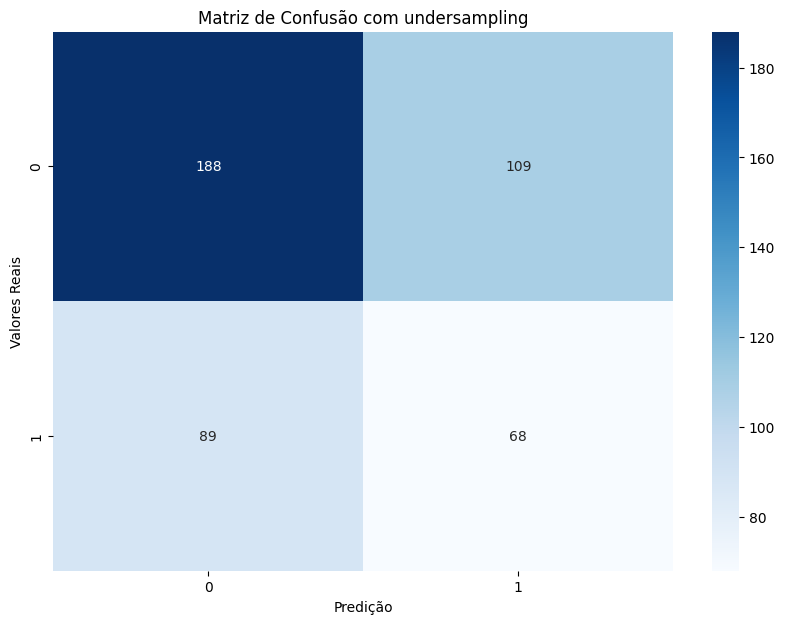

In [324]:
cm = confusion_matrix(y_test_s, y_pred_s)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão com undersampling')
plt.show()

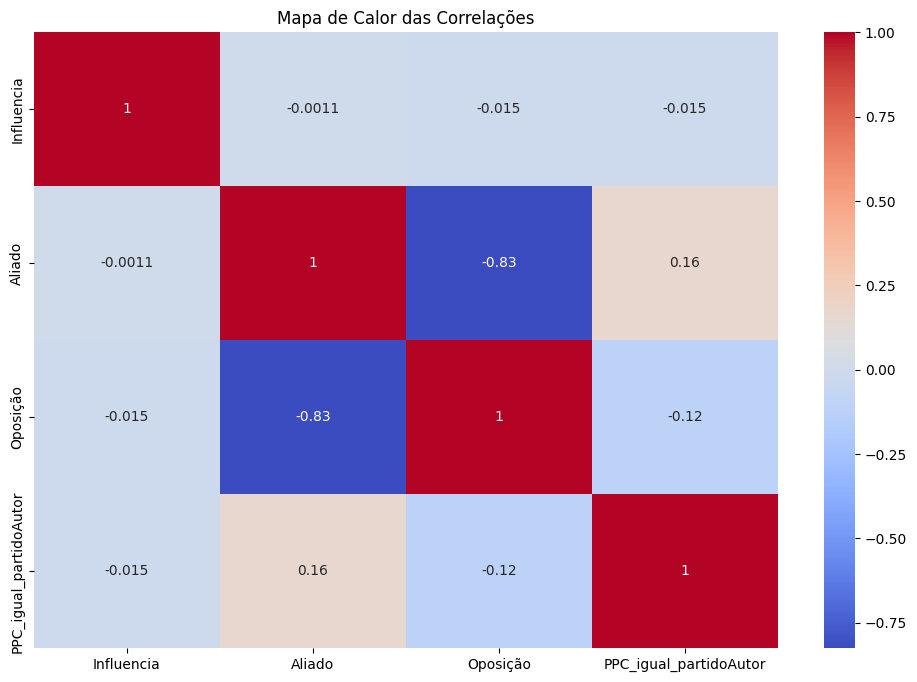

In [325]:
correlation_matrix = x.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Mapa de Calor das Correlações')
plt.show()

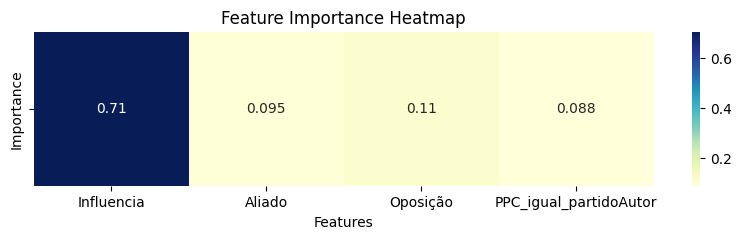

In [326]:
feature_names = x.columns
importances = clf_s.feature_importances_

importance_df = pd.DataFrame(importances.reshape(1, -1), columns=feature_names)

plt.figure(figsize=(10, 2))
sns.heatmap(importance_df, annot=True, cmap="YlGnBu", cbar=True, xticklabels=feature_names, yticklabels=["Importance"])
plt.title('Feature Importance Heatmap')
plt.xlabel('Features')
plt.show()

In [327]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

principal_components

array([[ 0.52101149, -0.13007302],
       [ 0.52099269, -0.12994276],
       [ 0.52099292, -0.12994435],
       ...,
       [-0.88796071, -0.01259779],
       [ 0.52099431, -0.12995402],
       [ 0.52103084, -0.13020709]])

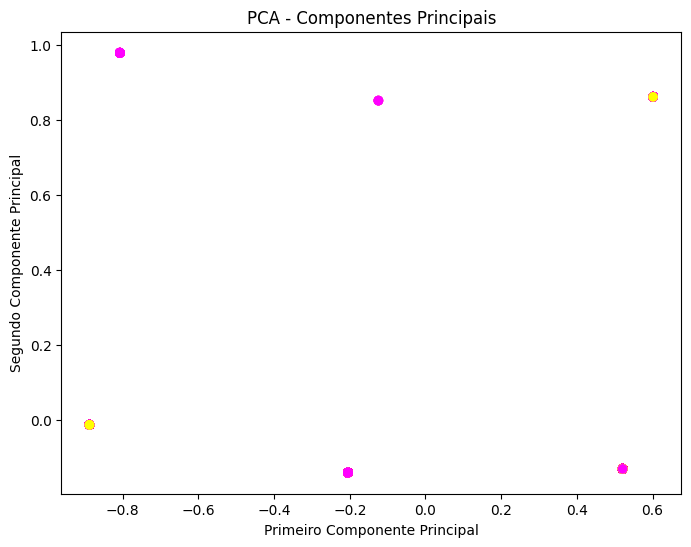

In [328]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y, cmap='spring')
plt.title('PCA - Componentes Principais')
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.show()